In [1]:
import pandas as pd
data=pd.read_csv('C:\\Users\\nEW u\\Desktop\\DataSEts\\Book2(titanic_datasets_D.T).csv')
data.head(3)

,passengerId,survived,pclass,name,Sex,Age,sibsp,parch,ticket,fare,cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
import seaborn as sns

sns.heatmap(data.isnull(),yticklabels=False)

In [3]:
data.Age.isnull().sum()

177

In [4]:
data.cabin.isnull().sum()

687

In [5]:
data.drop(['passengerId','name','sibsp','parch','ticket','cabin','Embarked'], axis='columns', inplace=True)

In [6]:
data.head()

,survived,pclass,Sex,Age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
survived    891 non-null int64
pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
fare        891 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [8]:
data.describe()

,survived,pclass,Age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [9]:
data.isnull().sum()

survived      0
pclass        0
Sex           0
Age         177
fare          0
dtype: int64

In [10]:
data.pclass.unique()

array([3, 1, 2], dtype=int64)

In [11]:
data.Age.mean()

29.69911764705882

In [12]:
data.Age.median()

28.0

In [13]:
data.Age.mode()

0    24.0
dtype: float64

In [14]:
x=data.drop(['survived'],axis='columns')
y=data.survived

In [15]:
x.head()

,pclass,Sex,Age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [16]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



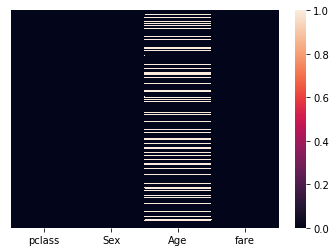

In [18]:
sns.heatmap(x.isnull(),yticklabels=False)

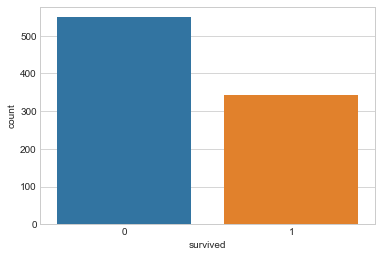

In [19]:
sns.set_style('whitegrid')#darkgrid, whitegrid, dark, white, ticks
sns.countplot(data.survived,data=x)

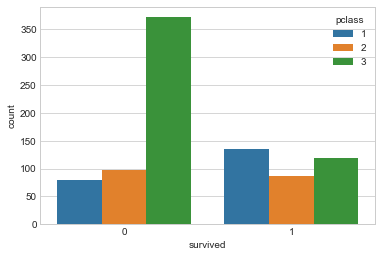

In [20]:
sns.countplot(data.survived, data=x,hue=data.pclass)

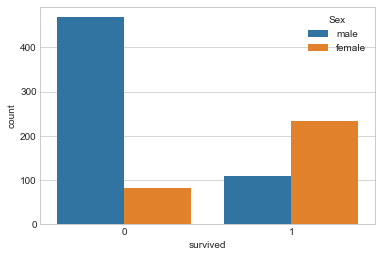

In [21]:
sns.countplot(data.survived, data=x, hue=x.Sex)

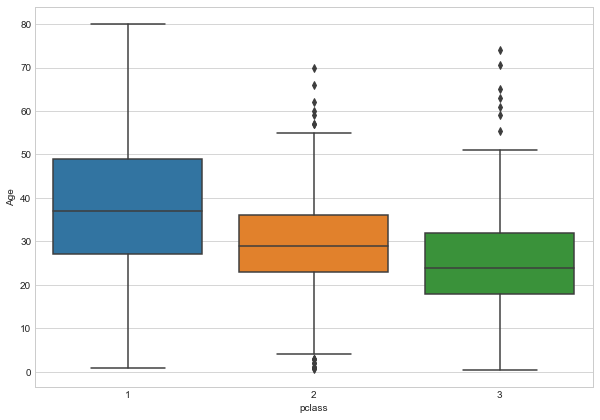

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x.pclass,x.Age, data=x )

In [23]:
#min() age im pclass=1, is 37
#min() age in pclass=2 is 29
#min() age in pclass=3 is 24

#replacing the age..

def replace_age(cols):
    Age=cols[0]
    pclass=cols[0]
    
    if pd.isnull(Age):
        
        if pclass ==1:
            return 37
        elif pclass==2:
            return 29
        elif pclass==3:
            return 24
    else:
        return Age

In [24]:
x['Age']=x[['Age','pclass']].apply(replace_age,axis=1)

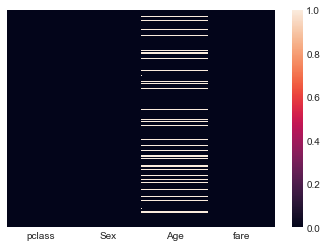

In [25]:
sns.heatmap(x.isnull(),yticklabels=False)

In [26]:
x.Age.mean()

29.69911764705882

In [27]:
x['Age']=x['Age'].fillna(x['Age'].mean())

In [28]:
x.Age.isnull().sum()

0

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
fare      891 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 27.9+ KB


In [30]:
x.Sex=x.Sex.map({'male': 1 , 'female':0})

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
pclass    891 non-null int64
Sex       891 non-null int64
Age       891 non-null float64
fare      891 non-null float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [33]:
len(X_train)

712

In [34]:
len(X_test)

179

In [35]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
model.score(X_test,y_test)

0.8100558659217877

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[89, 14],
       [20, 56]], dtype=int64)

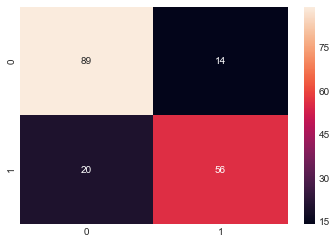

In [38]:
sns.heatmap(cm,annot=True)